<a href="https://colab.research.google.com/github/pratyushgta/image-video-processing/blob/main/IVP_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

# EXPERIMENT 6

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # used for plotting/displaying the image. without this lib, pic will be displayed as a set of numbers / pixels
import numpy as np
# following will be used in filtering & saltpepper
from skimage import io
from skimage.color import rgb2gray
from scipy import signal

In [ ]:
im = mpimg.imread("morpho_squares.png")

In [ ]:
## THRESHOLDING-

# for rgb image, do:
# image_1 = rgb2gray(imc)

# for grayscale image, do thresholding
threshold = float(input("Enter Threshold: "))
im_thresholded = im.copy()
for i in range(im_thresholded.shape[0]):
    for j in range(im_thresholded.shape[1]):
        if im_thresholded[i, j] < threshold:
            im_thresholded[i, j] = 0
        else:
            im_thresholded[i, j] = 255

Enter Threshold: 0.5


> **6.a EROSION**

In [ ]:
## EROSION-

# SE = Structuring element

def erosion(im_thresholded, sz):
    im_erosion = im_thresholded.copy()

    # Create the structuring element
    SE = 255 * np.ones((sz, sz))

    # Calculate the center of the structuring element
    cent = int((sz - 1) / 2)

    sh = im_erosion.shape
    r = sh[0]  # row
    c = sh[1]  # column

    for row in range(cent, r - cent):
        for col in range(cent, c - cent):
            temp = im_thresholded[row - cent:row + cent + 1, col - cent:col + cent + 1]
            # Check if temp is equal to the structuring element
            if np.array_equal(temp, SE):
                im_erosion[cent, cent] = 255
            else:
                im_erosion[row, col] = 0

    return im_erosion

In [ ]:
# >>>>make a 3x3, 5x5, 7x7, 11x11, 16x16 SE<<<<
im_erosion3 = erosion(im_thresholded, 3)
im_erosion5 = erosion(im_thresholded, 5)
im_erosion7 = erosion(im_thresholded, 7)
im_erosion9 = erosion(im_thresholded, 9)
im_erosion11 = erosion(im_thresholded, 11)

Text(0.5, 1.0, '11x11 eroded image')

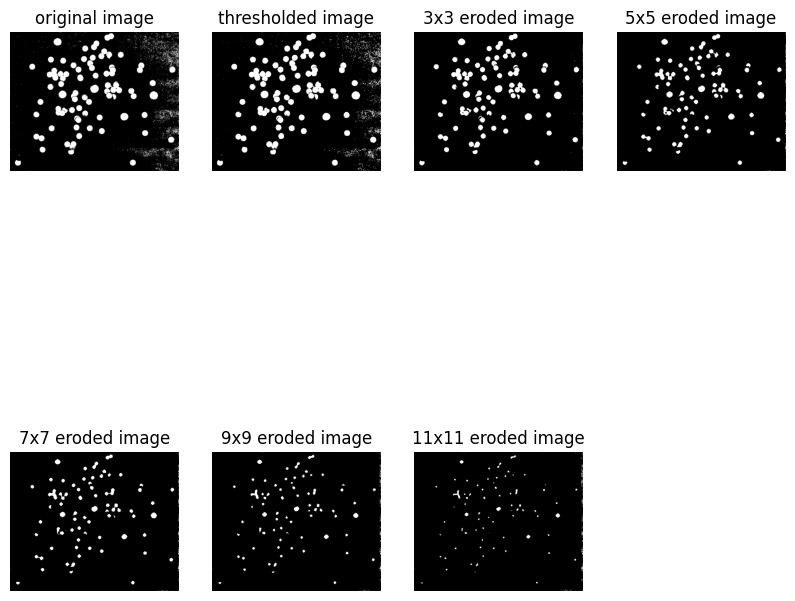

In [ ]:
# plotting
plt.figure(figsize=(10,10))

plt.subplot(2,4,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,4,2)
plt.imshow(im_thresholded,cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(2,4,3)
plt.imshow(im_erosion3,cmap='gray')
plt.axis('off')
plt.title('3x3 eroded image')

plt.subplot(2,4,4)
plt.imshow(im_erosion5,cmap='gray')
plt.axis('off')
plt.title('5x5 eroded image')

plt.subplot(2,4,5)
plt.imshow(im_erosion7,cmap='gray')
plt.axis('off')
plt.title('7x7 eroded image')

plt.subplot(2,4,6)
plt.imshow(im_erosion9,cmap='gray')
plt.axis('off')
plt.title('9x9 eroded image')

plt.subplot(2,4,7)
plt.imshow(im_erosion11,cmap='gray')
plt.axis('off')
plt.title('11x11 eroded image')

> **6.b DILATION**

In [ ]:
## DILATION-

# SE = Structuring element

def dilation(im_thresholded, sz):
    im_dilation = im_thresholded.copy()

    # Create the structuring element
    SE = 255 * np.ones((sz, sz))

    # Calculate the center of the structuring element
    cent = int((sz - 1) / 2)

    # location of median within the sorted values
    med=int(((sz*sz)-1)/2)

    sh = im_dilation.shape
    r = sh[0]  # row
    c = sh[1]  # column

    for row in range(cent,r-cent):
      for col in range(cent,c-cent):
        temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
        # check if temp is equal to structuring element
        if(np.isin(255,temp)):
          im_dilation[row,col] = 255
        else:
          im_dilation[row,col] = 0
    return im_dilation

In [ ]:
# >>>>make a 3x3, 5x5, 7x7, 11x11, 16x16 SE<<<<
im_dilation3 = dilation(im_thresholded, 3)
im_dilation5 = dilation(im_thresholded, 5)
im_dilation7 = dilation(im_thresholded, 7)
im_dilation9 = dilation(im_thresholded, 9)
im_dilation11 = dilation(im_thresholded, 11)

Text(0.5, 1.0, '11x11 dilated image')

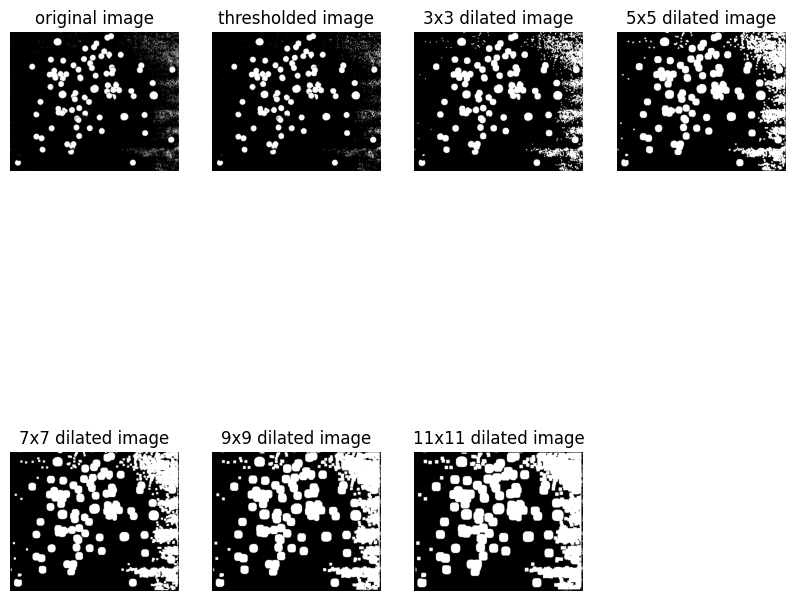

In [ ]:
# plotting
plt.figure(figsize=(10,10))

plt.subplot(2,4,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,4,2)
plt.imshow(im_thresholded,cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(2,4,3)
plt.imshow(im_dilation3,cmap='gray')
plt.axis('off')
plt.title('3x3 dilated image')

plt.subplot(2,4,4)
plt.imshow(im_dilation5,cmap='gray')
plt.axis('off')
plt.title('5x5 dilated image')

plt.subplot(2,4,5)
plt.imshow(im_dilation7,cmap='gray')
plt.axis('off')
plt.title('7x7 dilated image')

plt.subplot(2,4,6)
plt.imshow(im_dilation9,cmap='gray')
plt.axis('off')
plt.title('9x9 dilated image')

plt.subplot(2,4,7)
plt.imshow(im_dilation11,cmap='gray')
plt.axis('off')
plt.title('11x11 dilated image')

> **6.c OPENING**

Text(0.5, 1.0, '11x11 opened image')

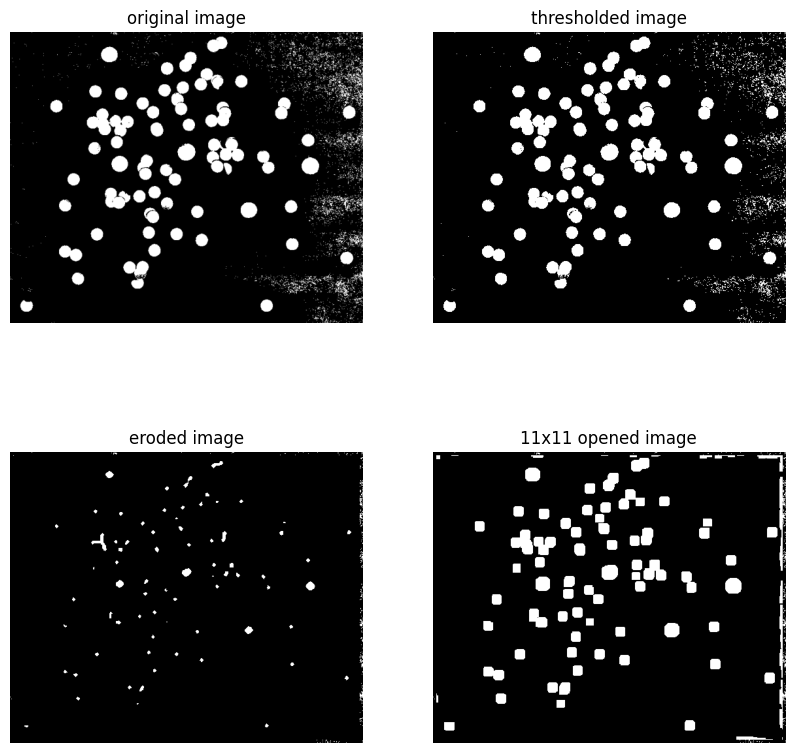

In [ ]:
# first erosion is performed and then dilation
im_op_erosion = erosion(im_thresholded, 11)
im_opening = dilation(im_op_erosion, 11)

# plotting
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,2,2)
plt.imshow(im_thresholded,cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(2,2,3)
plt.imshow(im_op_erosion,cmap='gray')
plt.axis('off')
plt.title('eroded image')

plt.subplot(2,2,4)
plt.imshow(im_opening,cmap='gray')
plt.axis('off')
plt.title('11x11 opened image')

> **6.d CLOSING**

Text(0.5, 1.0, '11x11 closed image')

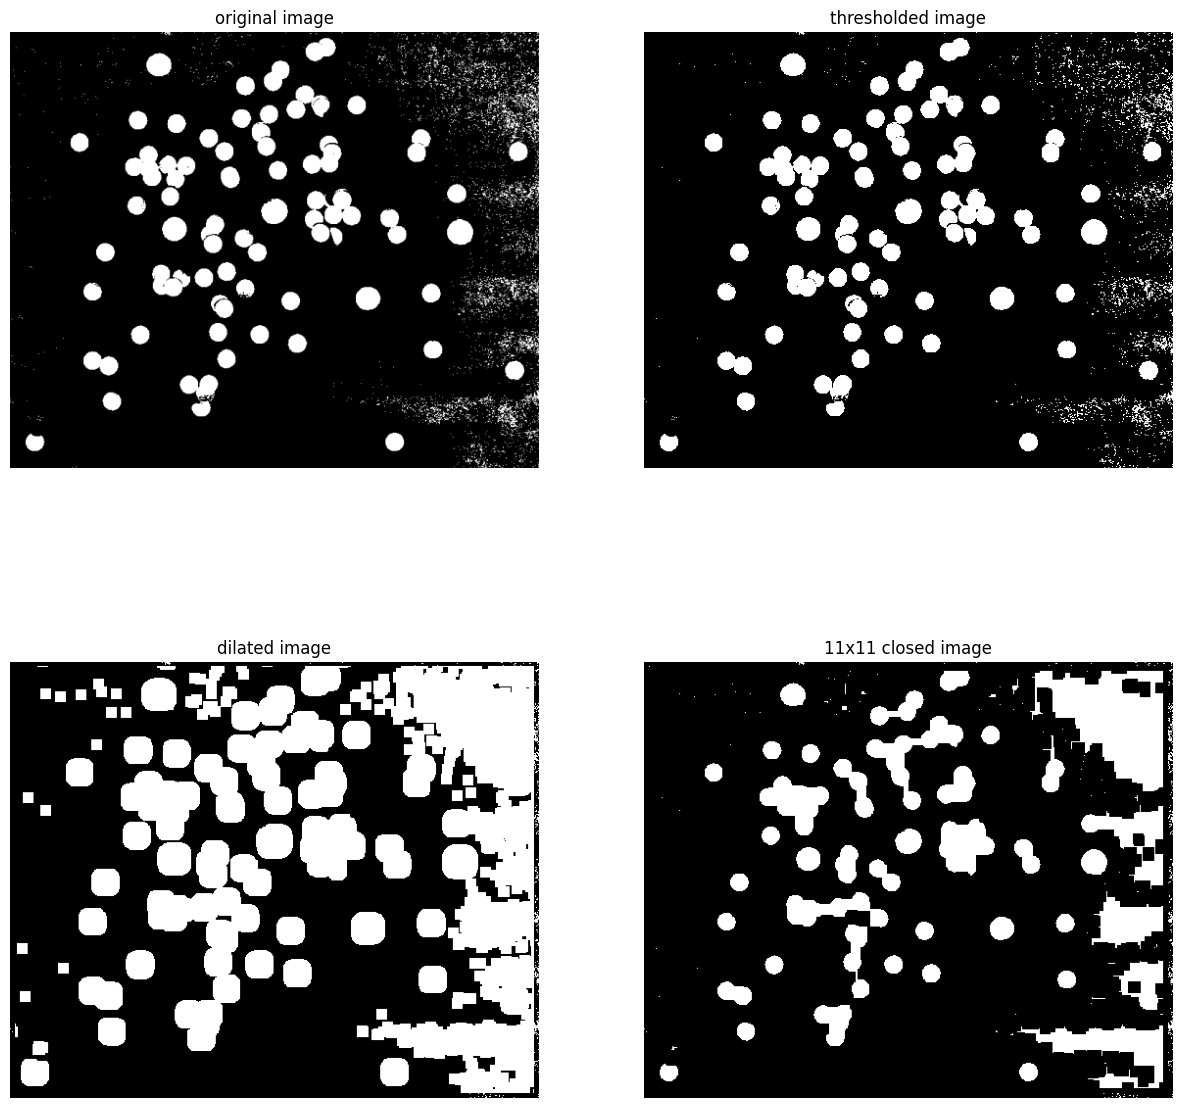

In [ ]:
# first dilation is performed and then erosion
im_op_dilation = dilation(im_thresholded, 11)
im_closing = erosion(im_op_dilation, 11)

# plotting
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,2,2)
plt.imshow(im_thresholded,cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(2,2,3)
plt.imshow(im_op_dilation,cmap='gray')
plt.axis('off')
plt.title('dilated image')

plt.subplot(2,2,4)
plt.imshow(im_closing,cmap='gray')
plt.axis('off')
plt.title('11x11 closed image')

# extra temp code

In [ ]:
# ## EROSION-

# # SE = Structuring element

# # >>>>make a 3x3 SE<<<<
# im_erosion3 = im_thresholded.copy()
# sz=3
# SE=255*np.ones((sz,sz))
# # center of masked image
# cent = int((sz-1)/2)
# # location of median within the sorted values
# med=int(((sz*sz)-1)/2)

# sh = im_erosion3.shape
# r = sh[0] # row
# c = sh[1] # column

# for row in range(cent,r-cent):
#   for col in range(cent,c-cent):
#     temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
#     # check if temp is equal to structuring element
#     if(np.array_equal(temp,SE)):
#       im_erosion3[cent,cent] = 255
#     else:
#       im_erosion3[row,col] = 0


# # >>>>make a 5x5 SE<<<<
# im_erosion5 = im_thresholded.copy()
# sz=5
# SE=255*np.ones((sz,sz))
# # center of masked image
# cent = int((sz-1)/2)
# # location of median within the sorted values
# med=int(((sz*sz)-1)/2)
# sh = im_erosion3.shape
# r = sh[0] # row
# c = sh[1] # column

# for row in range(cent,r-cent):
#   for col in range(cent,c-cent):
#     temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
#     # check if temp is equal to structuring element
#     if(np.array_equal(temp,SE)):
#       im_erosion5[cent,cent] = 255
#     else:
#       im_erosion5[row,col] = 0


# # >>>>make a 7x7 SE<<<<
# im_erosion7 = im_thresholded.copy()
# sz=7
# SE=255*np.ones((sz,sz))
# # center of masked image
# cent = int((sz-1)/2)
# # location of median within the sorted values
# med=int(((sz*sz)-1)/2)
# sh = im_erosion7.shape
# r = sh[0] # row
# c = sh[1] # column

# for row in range(cent,r-cent):
#   for col in range(cent,c-cent):
#     temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
#     # check if temp is equal to structuring element
#     if(np.array_equal(temp,SE)):
#       im_erosion7[cent,cent] = 255
#     else:
#       im_erosion7[row,col] = 0


# # >>>>make a 11x11 SE<<<<
# im_erosion11 = im_thresholded.copy()
# sz=11
# SE=255*np.ones((sz,sz))
# # center of masked image
# cent = int((sz-1)/2)
# # location of median within the sorted values
# med=int(((sz*sz)-1)/2)
# sh = im_erosion11.shape
# r = sh[0] # row
# c = sh[1] # column

# for row in range(cent,r-cent):
#   for col in range(cent,c-cent):
#     temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
#     # check if temp is equal to structuring element
#     if(np.array_equal(temp,SE)):
#       im_erosion11[cent,cent] = 255
#     else:
#       im_erosion11[row,col] = 0



# # >>>>make a 16x16 SE<<<<
# im_erosion16 = im_thresholded.copy()
# sz=11
# SE=255*np.ones((sz,sz))
# # center of masked image
# cent = int((sz-1)/2)
# # location of median within the sorted values
# med=int(((sz*sz)-1)/2)
# sh = im_erosion16.shape
# r = sh[0] # row
# c = sh[1] # column

# for row in range(cent,r-cent):
#   for col in range(cent,c-cent):
#     temp = im_thresholded[row-cent:row+cent+1,col-cent:col+cent+1]
#     # check if temp is equal to structuring element
#     if(np.array_equal(temp,SE)):
#       im_erosion16[cent,cent] = 255
#     else:
#       im_erosion16[row,col] = 0